# Machine Learning
After compiling the trials dataset from matlab into python, we wanted to test our hypothesis using binary classification methods to see if we could classify images that were human/non human based on the spikes that were fired in the neurons located in the hippocampus and amygdala.

In [16]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import pandas as pd

mat1 = sio.loadmat('./Final_data_variant1.mat')
mat2 = sio.loadmat('./Final_data_variant2.mat')
mat3 = sio.loadmat('./Final_data_variant3.mat')
data_variant1 = mat1['data']
data_variant2 = mat2['data']
data_variant3 = mat3['data']
data = np.concatenate((data_variant1,data_variant2,data_variant3),axis = 1)
data = data.T
np.random.shuffle(data)

data_1 = data[data[:,11]==1]
data_0 = data[data[:,11]==0]

As stated earlier, there were 2400 trials and 10 neurons to give us a 2400X10 matrix to work with.  However, when counting the 
number of human images to non-human images in our dataset, we observed that there was an imbalance. There were 465 human images and 1935 non-human images in our dataset, so we balanced our dataset by using a subset of the non-human images. Our final dataset contained 930 trials (465 non-human images & 465 human images) and 10 neurons to give us a 930X10 matrix to work with.

In [17]:
print(data_1.shape)
print(data_0.shape)

(465, 12)
(1935, 12)


In [18]:
data_0 = data_0[0:465,:]

bal_dat = np.concatenate((data_0,data_1),axis = 0)

X = bal_dat[:,0:10]
Y = bal_dat[:,11]

### Logistic Regression
The first classification method that was used was logistic regression. We wanted to start with the simplest binary classification model to see how it would perform, and what it would tell us about the data.  There was an initial assumption that logistic regression would perform well with the data because of it's binary nature. 

Ten-fold cross validation was used for the this model. The default solver "liblinear" was used to optimize the coefficients in the logistic regression model. This solver was used because the dataset was fairly small dataset. The logistic regression method did not prove to be a great method to classify the data.  It did about 1% better than chance at making predictions about the data. The area under the ROC curve was 55%, which is another metric showing that the model did not perform well. 

C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

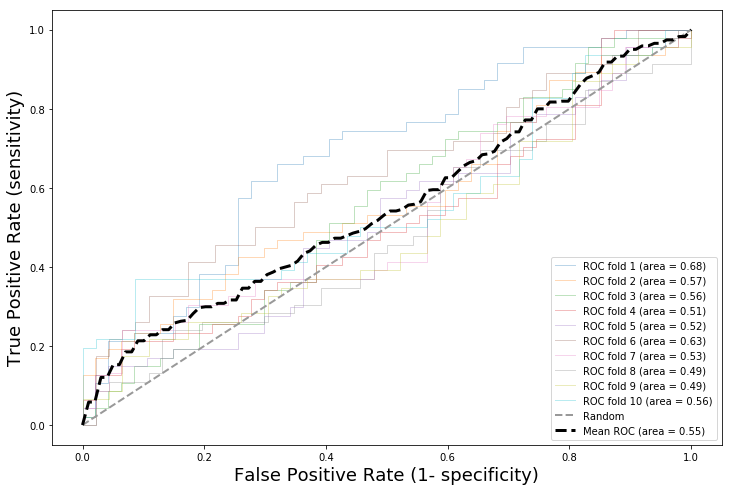

Average accuracy score for logistic regression is: 0.5182007400555041


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from scipy import interp

classifier = LogisticRegression(class_weight = "balanced")
classifier.fit(X,Y)
fig, ax1 = plt.subplots(figsize=(12, 8))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
results = []
for i, (train_index, test_index) in enumerate(skf.split(X,Y)):
    # calculate the probability of each class assuming it to be positive
    probas_ = classifier.fit(X[train_index], Y[train_index]).predict_proba(X[test_index])
    results.append(classifier.score(X[test_index], Y[test_index]))
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(Y[test_index], probas_[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha =0.3, 
             label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random', lw=2)

mean_tpr /= 10
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
label='Mean ROC (area = %0.2f)' % mean_auc, lw=3)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (1- specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.legend(loc = 'lower right')
plt.show()

score = np.array(results)

print('Average accuracy score for logistic regression is:', score.mean())

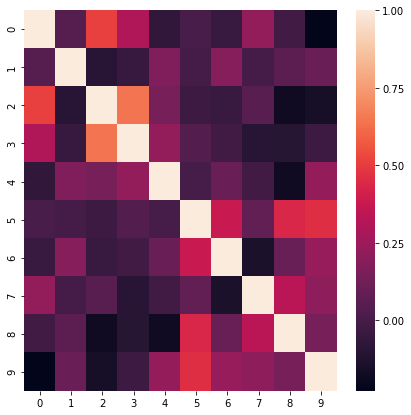

In [20]:
import seaborn as sb
data = pd.DataFrame(X)
correlation=data.corr()
f, ax = plt.subplots(figsize=(7,7))
sb.heatmap(correlation,square=False)
plt.show()

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
print(vif)

   VIF Factor  features
0    2.129561         0
1    1.650817         1
2    3.104219         2
3    2.378083         3
4    1.891974         4
5    2.694594         5
6    1.774744         6
7    2.251713         7
8    2.237443         8
9    2.831488         9


In [22]:
X1 = np.delete(X,2,1)
X1 = np.delete(X,8,1)
print(X1.shape)

(930, 9)


In [23]:
classifier.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

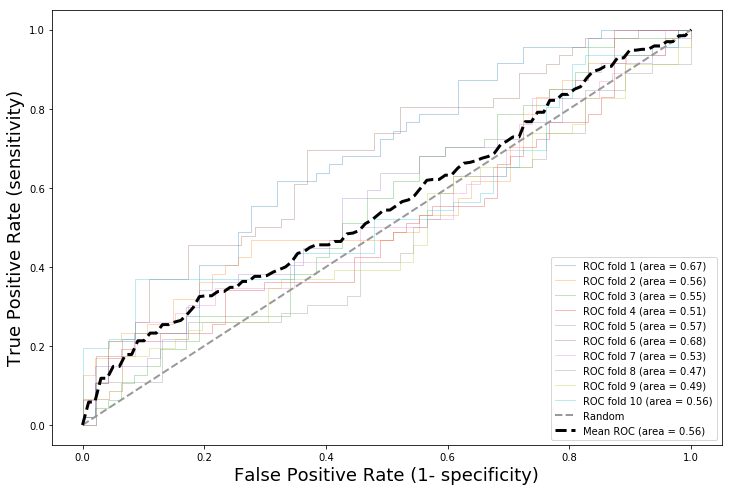

Average accuracy score for logistic regression is: 0.5343894542090657


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from scipy import interp

classifier = LogisticRegression(class_weight = "balanced")
classifier.fit(X1,Y)
fig, ax1 = plt.subplots(figsize=(12, 8))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
results = []
for i, (train_index, test_index) in enumerate(skf.split(X1,Y)):
    # calculate the probability of each class assuming it to be positive
    probas_ = classifier.fit(X1[train_index], Y[train_index]).predict_proba(X1[test_index])
    results.append(classifier.score(X1[test_index], Y[test_index]))
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(Y[test_index], probas_[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha =0.3, 
             label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random', lw=2)

mean_tpr /= 10
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
label='Mean ROC (area = %0.2f)' % mean_auc, lw=3)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (1- specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.legend(loc = 'lower right')
plt.show()

score = np.array(results)

print('Average accuracy score for logistic regression is:', score.mean())

Text(0.5, 0, 'features')

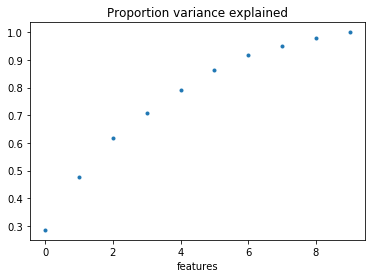

In [25]:
from sklearn.decomposition import PCA, FastICA
pca = PCA()
X_pca = pca.fit_transform(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_), '.')
plt.title("Proportion variance explained")
plt.xlabel("features")

A correlation matrix and VIFs were calculated to check for multicollinearity. Neurons 2 and 3 had an over 50% correlation with VIF factors over 2.5.  Neurons 5 and 9 also had an over 50% correlation with VIF factors over 2.5.  Even after removing neurons 2 and 9, the average logistic regression score did not improve. PCA was also used to accomplish Dimensionality Reduction. There are no apparent elbows in the scree plot, but 7 features account for over 90% of the variance in the data, which validates the VIF and correlation matrix.  Next the SVM method will be used to model the data to see if we can get better results.

### SVM

In [26]:
from sklearn.model_selection import KFold
n_folds = 10
kf = KFold(n_folds)

In [27]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# grid of parameters to be tested (can also be a list)
param_grid = {"C": np.logspace(-3, 3, 10), 
              "gamma": np.logspace(-3, 3, 10)}

# classifier to be tested
svm_rbf = SVC(kernel="rbf")

# create a grid object with k fold CV, testing the parameters above
grid = GridSearchCV(svm_rbf, cv=kf, param_grid=param_grid)

# fit the object
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'gamma': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
grid.best_params_

{'C': 215.44346900318823, 'gamma': 0.021544346900318832}

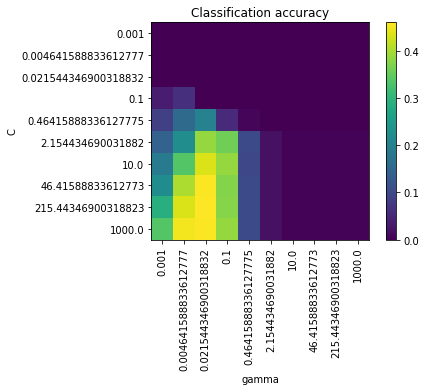

In [29]:
plt.imshow(grid.cv_results_["mean_test_score"].reshape(10, 10))
plt.xticks(np.arange(10), np.logspace(-3, 3, 10), rotation="vertical")
plt.xlabel("gamma")
plt.yticks(np.arange(10), np.logspace(-3, 3, 10))
plt.ylabel("C")
plt.title("Classification accuracy")
plt.colorbar()
plt.show()

In [30]:
print(np.max(grid.cv_results_['mean_test_score']))

0.46021505376344085


The SVM method was used because it models 2-class data well, so it works well classifying a binary dataset.  The C and gamma values were tuned to equal 1000, and 0.0046 respectively.  There is not much information known about the distribution of the dataset, which is fine because SVMs do not make assumptions on the dataset.  The basic principles of logistic regression are applied to SVMs, and SVMs usually provide better results.  In our case, it did perform better than chance (50%) and better than logistic regression (51%), but the accuracy score was only 54%. Next we will be looking more carefully at the Neural Network Model.

### SVM ROC

In [ ]:
svm_rbf = SVC(kernel="rbf", probability = True)
classifier = GridSearchCV(svm_rbf, cv=kf, param_grid=param_grid)
classifier.fit(X1,Y)
fig, ax1 = plt.subplots(figsize=(12, 8))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
results = []
for i, (train_index, test_index) in enumerate(skf.split(X1,Y)):
    # calculate the probability of each class assuming it to be positive
    probas_ = classifier.fit(X1[train_index], Y[train_index]).predict_proba(X1[test_index])
    results.append(classifier.score(X1[test_index], Y[test_index]))
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(Y[test_index], probas_[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha =0.3, 
             label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random', lw=2)

mean_tpr /= 10
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
label='Mean ROC (area = %0.2f)' % mean_auc, lw=3)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (1- specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.legend(loc = 'lower right')
plt.show()

score = np.array(results)

print('Average accuracy score for logistic regression is:', score.mean())

C:\Users\Sharon\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Neural Network
Because the previous models performed poorly, a neural network will be used to model the data. Neural networks can learn and model non-linear data that have complex relationships.  They also work well with data that has high volatility and a non constant variance.  They also generalize and predict unseen data well without overfitting through back propogation, gradient descent, and other methods. A good neural network needs to have a good topology so that every unseen relationship can be taken into account.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

X = X1

In [ ]:
#Neural Network
layer_sizes = [X.shape[1], int(X.shape[1]/2), np.unique(Y).shape[0]]
print(layer_sizes)

In [ ]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(units = layer_sizes[0], input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# evaluate baseline model
np.random.seed(seed)
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

A simple baseline model was created with input size 10 (10 features), 1 hidden layer of size 1 and an output layer of size 1. The output layer has size 1 because we have a binary dataset, and we are using sigmoid activation. Ten-fold cross validation is also used in the neural network with a low epoch size of 100 and 5.  The epoch and batch size is low for now to reduce computational time. This baseline model outputs an accuracy score of about 56%.  This base case is already better than the SVM model, but the accuracy score is still only 6% better than random.

In [ ]:
# evaluate baseline model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

The same baseline model is used, but the dataset is standardized, which improves the accuracy score and reduces the confidence interval.

In [ ]:
# smaller model
#input 10; 5; output 1
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(units = layer_sizes[1], input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

The hidden layer was changed to size 5 to see if it would affect the performance of the model. The accuracy score reduced and the confidence interval grew. Because the baseline model provides a better score, I will be adding another layer to the baseline model.

In [ ]:
# input 10; 10; 5; output 1
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(units = layer_sizes[0], input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger : %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

A hidden layer of size 10 was added to the neural network to give it more hidden layers. The accuracy score was still lower than the standardized baseline model.

Other neural networks with different topologies were explored but they did not perform close to or better than the base case.

In [ ]:
#input 10; 20; 10 output:1
def create_smaller():
    # create model
    model = Sequential()
    model.add(Dense(units = 20, input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
#input 10; 10; 10 ; 5; ouput 1
def create_smaller():
    # create model
    model = Sequential()
    model.add(Dense(units = layer_sizes[0], input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
#input 10; 100; 50; 30; 20; 10; ouput 1
def create_smaller():
    # create model
    model = Sequential()
    model.add(Dense(units = 100, input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# input 10; 20; 10; 5; output 1
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(units = 20, input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
	model.add(Dense(10, kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# input 10; 5; 5; 5; output 1
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(units = 5, input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

After running several neural network and trying different topographies, the neural network with an input size of 10, 3 hidden layers of size 5, and an output of 1 provided results that performed close to the standard baseline model.

In [ ]:
# input 10; 5; 5; 5; output 1
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(units = 5, input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

The dropout method was used so that any weighted values that could cause overfitting the data were dropped.  This method improved the score of the model. It also shows that the model is complex enough to make unseen relationships within the dataset.

In [ ]:
# input 10; 5; 5; 5; output 1
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(units = 5, input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standard with higher epoch and batch size: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Finally, the epoch and batch size increased to 10,000 and 64 respectively so that the neural network could be more finely tuned.  Although the accuracy score is higher than the standardized baseline model, I would trust this neural network better. Because the epoch score and batch size are much higher in this model, it is more likely that a local minimum was reached through stochastic gradient descent.

In [ ]:
# increase epoch size and batch size
# input 10; 5; 5; 5; output 1
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(units = 5, input_dim=layer_sizes[0], kernel_initializer='normal', activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=10000, batch_size=64, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger with higher epoch and batch size: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### Conclusion
After performing a number of machine learning algorithms on this dataset, we found that the our models only predicted about 1% to 8% better than chance.  There were many assumptions on our dataset that may have provided unclear results.  The assumption that the neuron cells in the hippocampus and amygdala spiked the same way could be a large reason why spike counts seem to not hold any predictive power in classifying human vs. non-human images.  The different images could also have been a factor in the spike count.  We classified the images as human vs. non-human, but we did not "normalize" the images--meaning we did not make sure the size of the humans were all similar.  We did not check if the humans were looking into the camera, or away from the camera.  The non-human images also vary greatly.  Some of these images are cars, landscapes, houses, etc.  This dataset is also comprised of a mixture of the 42 patients, so the way that the neurons fired in one person's brain may be different from the way it was fired in another person's brain.   Although the accurracy scores were low for the predictive models, they still predicted slightly better than chance.  Further research should be done to find the relationship between image observation and neuron spike count.